# Who Runs the Best Splits?

In [1]:
import os
import urllib.request
import urllib.parse

def download(url):
    filename = os.path.basename(urllib.parse.unquote(url))
    if not os.path.exists(filename):
        urllib.request.urlretrieve(url, filename)
        print("Downloaded " + filename)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

In [2]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

In [58]:
try:
    import runpandas
except ImportError:
    !pip install runpandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 1.5 MB/s eta 0:00:001.1 MB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 2.5 MB/s eta 0:00:007.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.6/118.6 kB 2.1 MB/s eta 0:00:00m eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 1.8 MB/s eta 0:00:002.0 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.8 MB/s eta 0:00:000:00:010:00:01:01
  Created wheel for fitparse: filename=fitparse-1.2.0-py3-none-any.whl size=68214 sha256=8c83979bf5b7741210c1aed951eb3d64286907a2caf4816c132dfa10c0ad6156
  Stored in directory: /home/downey/.cache/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

## Title


In [ ]:
# https://www.bbc.com/future/article/20240731-the-sports-where-women-outperform-men

In [5]:
# https://github.com/adrian3/Boston-Marathon-Data-Project/blob/master/results2017.csv

In [138]:
df = pd.read_csv('results2017.csv')
df.head()

,place_overall,bib,name,age,gender,city,state,country_residence,contry_citizenship,name_suffix,...,pace,projected_time,official_time,overall,gender_result,division_result,seconds,first_name,last_name,display_name
0,0.0,11,"Kirui, Geoffrey",24.0,M,Keringet,NaN,KEN,NaN,NaN,...,0:04:57,-,2:09:37,1.0,1.0,1.0,7777,Geoffrey,Kirui,Geoffrey Kirui
1,1.0,17,"Rupp, Galen",30.0,M,Portland,OR,USA,NaN,NaN,...,0:04:58,-,2:09:58,2.0,2.0,2.0,7798,Galen,Rupp,Galen Rupp
2,2.0,23,"Osako, Suguru",25.0,M,Machida-City,NaN,JPN,NaN,NaN,...,0:04:59,-,2:10:28,3.0,3.0,3.0,7828,Suguru,Osako,Suguru Osako
3,3.0,21,"Biwott, Shadrack",32.0,M,Mammoth Lakes,CA,USA,NaN,NaN,...,0:05:03,-,2:12:08,4.0,4.0,4.0,7928,Shadrack,Biwott,Shadrack Biwott
4,4.0,9,"Chebet, Wilson",31.0,M,Marakwet,NaN,KEN,NaN,NaN,...,0:05:04,-,2:12:35,5.0,5.0,5.0,7955,Wilson,Chebet,Wilson Chebet


In [139]:
df['age'].value_counts().sort_index()

age
18.0     20
19.0     43
20.0     83
21.0    147
22.0    210
       ... 
79.0      3
80.0      3
81.0      2
83.0      1
84.0      1
Name: count, Length: 66, dtype: int64

In [140]:
df['gender'].value_counts().sort_index()

gender
F    11972
M    14438
Name: count, dtype: int64

In [141]:
split_cols = ['5k', '10k', '15k', '20k', '25k', '30k', '35k', '40k']

In [142]:
def make_timedelta(series):
    return pd.to_timedelta(series, errors='coerce')

In [143]:
cumulative_splits = df[split_cols].map(make_timedelta)
cumulative_splits.head()

,5k,10k,15k,20k,25k,30k,35k,40k
0,0 days 00:15:25,0 days 00:30:28,0 days 00:45:44,0 days 01:01:15,0 days 01:16:59,0 days 01:33:01,0 days 01:48:19,0 days 02:02:53
1,0 days 00:15:24,0 days 00:30:27,0 days 00:45:44,0 days 01:01:15,0 days 01:16:59,0 days 01:33:01,0 days 01:48:19,0 days 02:03:14
2,0 days 00:15:25,0 days 00:30:29,0 days 00:45:44,0 days 01:01:16,0 days 01:17:00,0 days 01:33:01,0 days 01:48:31,0 days 02:03:38
3,0 days 00:15:25,0 days 00:30:29,0 days 00:45:44,0 days 01:01:19,0 days 01:17:00,0 days 01:33:01,0 days 01:48:58,0 days 02:04:35
4,0 days 00:15:25,0 days 00:30:28,0 days 00:45:44,0 days 01:01:15,0 days 01:16:59,0 days 01:33:01,0 days 01:48:41,0 days 02:05:00


In [144]:
splits = cumulative_splits.diff(axis=1)
splits['5k'] = cumulative_splits['5k']
splits.head()

,5k,10k,15k,20k,25k,30k,35k,40k
0,0 days 00:15:25,0 days 00:15:03,0 days 00:15:16,0 days 00:15:31,0 days 00:15:44,0 days 00:16:02,0 days 00:15:18,0 days 00:14:34
1,0 days 00:15:24,0 days 00:15:03,0 days 00:15:17,0 days 00:15:31,0 days 00:15:44,0 days 00:16:02,0 days 00:15:18,0 days 00:14:55
2,0 days 00:15:25,0 days 00:15:04,0 days 00:15:15,0 days 00:15:32,0 days 00:15:44,0 days 00:16:01,0 days 00:15:30,0 days 00:15:07
3,0 days 00:15:25,0 days 00:15:04,0 days 00:15:15,0 days 00:15:35,0 days 00:15:41,0 days 00:16:01,0 days 00:15:57,0 days 00:15:37
4,0 days 00:15:25,0 days 00:15:03,0 days 00:15:16,0 days 00:15:31,0 days 00:15:44,0 days 00:16:02,0 days 00:15:40,0 days 00:16:19


In [145]:
def total_seconds(td):
    return td.total_seconds()

In [146]:
split_seconds = splits.map(total_seconds)
split_seconds.head()

,5k,10k,15k,20k,25k,30k,35k,40k
0,925.0,903.0,916.0,931.0,944.0,962.0,918.0,874.0
1,924.0,903.0,917.0,931.0,944.0,962.0,918.0,895.0
2,925.0,904.0,915.0,932.0,944.0,961.0,930.0,907.0
3,925.0,904.0,915.0,935.0,941.0,961.0,957.0,937.0
4,925.0,903.0,916.0,931.0,944.0,962.0,940.0,979.0


In [147]:
df['cv'] = split_seconds.std(axis=1) / split_seconds.mean(axis=1) * 100
df['cv'].describe()

count    26406.000000
mean         9.075549
std          6.576482
min          0.364927
25%          4.590847
50%          7.740286
75%         11.793587
max        133.265879
Name: cv, dtype: float64

In [148]:
df.groupby('gender')['cv'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,11969.0,7.938585,5.434206,0.427746,4.298868,6.967892,10.219680,106.089578
M,14437.0,10.018150,7.257189,0.364927,4.904113,8.615780,13.396307,133.265879


In [149]:
index = df['cv'].idxmin()
df.loc[1301]

place_overall                     1301.0
bib                                 1396
name                  Ferguson, J Daniel
age                                 36.0
gender                                 M
city                            New York
state                                 NY
country_residence                    USA
contry_citizenship                   NaN
name_suffix                          NaN
5k                               0:21:01
10k                              0:42:06
15k                              1:03:12
20k                              1:24:20
half                             1:28:59
25k                              1:45:28
30k                              2:06:41
35k                              2:27:56
40k                              2:49:08
pace                             0:06:50
projected_time                         -
official_time                    2:58:54
overall                           1302.0
gender_result                     1219.0
division_result 

In [150]:
split_seconds.iloc[index]

5k     1261.0
10k    1265.0
15k    1266.0
20k    1268.0
25k    1268.0
30k    1273.0
35k    1275.0
40k    1272.0
Name: 1301, dtype: float64

In [158]:
df['total_seconds'] = df['official_time'].map(make_timedelta).map(total_seconds)

In [163]:
male = df.query("gender == 'M'")
female = df.query("gender == 'F'")

In [164]:
from empiricaldist import Cdf

cdf_male = Cdf.from_seq(male['cv'])
cdf_female = Cdf.from_seq(female['cv'])

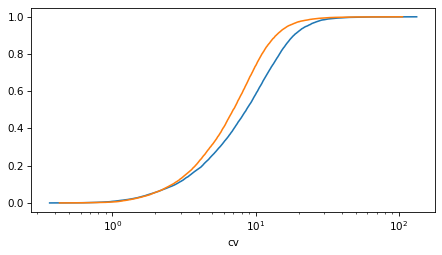

In [166]:
cdf_male.plot()
cdf_female.plot()

decorate(xscale='log')

In [203]:
def scatter(df):
    ys = df['cv']
    plt.scatter(df['total_seconds'], ys, marker='.', s=1, alpha=0.1)
    decorate()

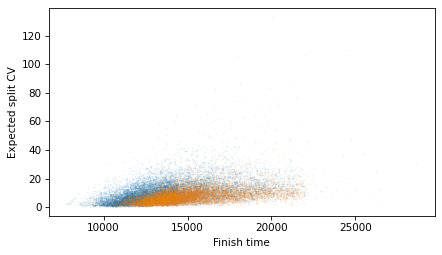

In [204]:
scatter(male)
scatter(female)

decorate(xlabel='Finish time', ylabel='Expected split CV')

In [208]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Fit a Gamma regression with a log link
model = smf.glm(formula='cv ~ total_seconds', data=male, 
                family=sm.families.Gamma(sm.families.links.log()))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     cv   No. Observations:                14437
Model:                            GLM   Df Residuals:                    14435
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:                         0.40093
Method:                          IRLS   Log-Likelihood:                -43891.
Date:                Sun, 22 Sep 2024   Deviance:                       5693.9
Time:                        11:36:21   Pearson chi2:                 5.79e+03
No. Iterations:                    15   Pseudo R-squ. (CS):             0.2364
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4084      0.029     14.266      0.000       0.352       0.464
total_seconds     0.0001   2.05e-06     65.462      0.000       0.000       0.000
=================================================================================
"""

In [184]:

low, high = male['total_seconds'].min(), male['total_seconds'].max()
xs = np.linspace(low, high)
ys = result.predict

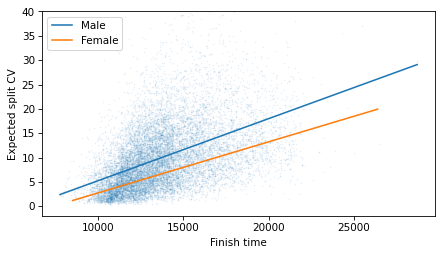

In [190]:
scatter(male)

xs, ys = fit_line(male)
plt.plot(xs, ys, label='Male')

xs, ys = fit_line(female)
plt.plot(xs, ys, label='Female')

decorate(xlabel='Finish time', ylabel='Expected split CV', ylim=[-2, 40])

In [180]:
get_slope(female)

0.0010499371945656842